In [1]:
%pylab inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_max_from_df(df):
    return df.max(axis=0)['X'], df.max(axis=0)['Y']

In [3]:
layers = [0, 1, 2]
wd_vals = [1e-3, 1e-4, 1e-5, 1e-6, 0]
wd_mie = pd.DataFrame(columns=layers)

for layer in layers:
    for wd_val in wd_vals:
        wd_path = 'weight_decay_mie_values/mie_mlp_train__lLinear%s_w%s_s69.csv' % (layer, 0 if wd_val==0 else int(1/wd_val))
        wd_mie.loc[wd_val, layer] = get_max_from_df(pd.read_csv(wd_path, sep=' ', index_col=0))


wd_mie

,0,1,2
0.001000,"(11.788130964713075, 2.3445274845401256)","(11.0006423685788, 2.343377195687091)","(11.275901627201605, 2.346506446176231)"
0.000100,"(11.427419411627602, 2.3455625546487022)","(10.190286082679062, 2.3471514119356165)","(10.73224299891865, 2.3513225379148364)"
0.000010,"(11.324993161793568, 2.3464037117799883)","(10.879974640941168, 2.346806370392795)","(10.963589394827023, 2.350299199751768)"
0.000001,"(11.367563289488661, 2.345736265323738)","(10.985195216409405, 2.3446425349226496)","(12.065866465817132, 2.3528739575526156)"
0.000000,"(11.1424207122405, 2.3448912600205407)","(11.642456285196458, 2.345349877225279)","(12.100688300426535, 2.353458126009358)"


In [4]:
layers = [0, 1, 2]
do_vals = [0.1, 0.25, 0.5]
do_mie = pd.DataFrame(columns=layers)

for layer in layers:
    for do_val in do_vals:
        do_path = 'dropout_mie_values/mie_mlp_train__lLinear%s_w0_s69_d0%s.csv' % (layer, str(do_val).replace('0.', ''))
        do_mie.loc[do_val, layer] = get_max_from_df(pd.read_csv(do_path, sep=' ', index_col=0))

do_mie

,0,1,2
0.10,"(11.008647316440024, 2.3444429186848104)","(10.947228040740388, 2.3426490979737014)","(8.617414702171397, 2.3494997444028543)"
0.25,"(11.05828395048024, 2.3440924775543936)","(10.271226713442688, 2.340752098656379)","(6.7578131576284965, 2.3429880324415686)"
0.50,"(11.348181359575825, 2.3402250137939267)","(7.88249001288301, 2.3160675103065533)","(4.231245694567241, 2.30631268349304)"


In [64]:
# layers = [0, 1, 2]
vib_beta_vals = [1, 2, 3, 4, 5]
vib_mie = pd.DataFrame(columns=[2])
layers = vib_mie.columns.values

for layer in layers:
    for vib_val in vib_beta_vals:
        vib_path = 'vib_mie_values/1e%s.csv' % vib_val
        vib_mie.loc['1e-%s' % vib_val, 2] = get_max_from_df(pd.read_csv(vib_path, sep=' ', index_col=0))

vib_mie

,2
1e-1,"(2.2147030251286037, 2.1111897779584496)"
1e-2,"(2.5872479629177616, 2.324947485285348)"
1e-3,"(3.774134405133848, 2.3471957521416)"
1e-4,"(7.481858338789919, 2.350941629771373)"
1e-5,"(10.320041737850245, 2.352484049672764)"


In [68]:
!pwd

/Users/ntokoven/Dropbox/_Education/_UvA/_Thesis/information-bottleneck/experiments_3103


In [81]:
def information_plane(mi_df, reg_type):
    params_vals = mi_df.index.values
    layers = mi_df.columns.values
    print(params_vals, layers)
    fig, ax = plt.subplots(len(params_vals), 1, sharex=True, sharey=True)
    set_legend = True
    for i in range(len(params_vals)):
        p = params_vals[i]
        for j in range(len(layers)):
            l = layers[j]
            if set_legend:
                ax[i].scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=colors[layers[j]], label='Linear%s' % l)
                ax[i].legend(loc='best')
            else:
                ax[i].scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=colors[layers[j]])
            ax[i].annotate('%s %s' % (reg_type, p), (mi_df.loc[p, l][0]-0.05, mi_df.loc[p, l][1]+0.01))
            ax[i].grid()
            #ax[i].title.set_text('Weight decay %s' % p)
        set_legend = False

    fig.text(0.5, 0.04, 'I(X, Z)', ha='center')
    fig.text(0.04, 0.5, 'I(Z, Y)', va='center', rotation='vertical')
    fig.set_size_inches(10, 7, forward=True)
    #fig.suptitle('This is a somewhat long figure title', fontsize=8)
    if not os.path.exists('information_planes'):
        os.makedirs('information_planes')
    fig.show()
    fig.savefig('information_planes/%s.png' % reg_type)

[1.e-03 1.e-04 1.e-05 1.e-06 0.e+00] [0 1 2]


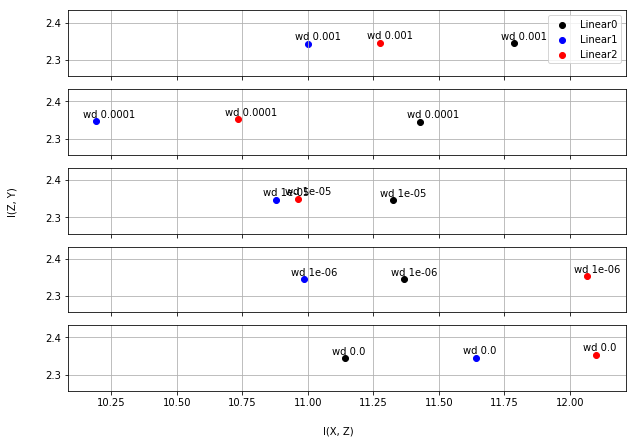

In [82]:
information_plane(wd_mie, 'wd')

[0.1  0.25 0.5 ] [0 1 2]


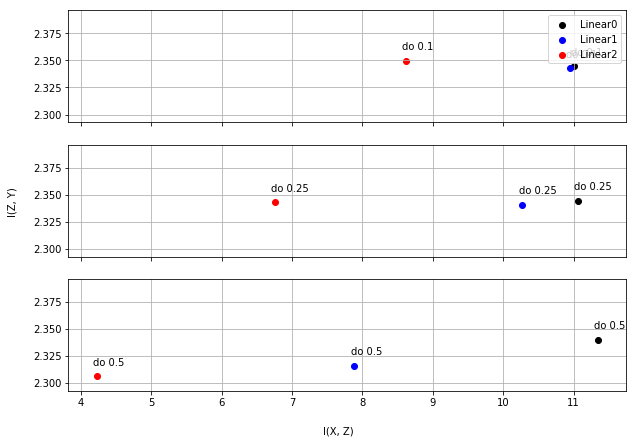

In [83]:
information_plane(do_mie, 'do')

['1e-1' '1e-2' '1e-3' '1e-4' '1e-5'] [2]


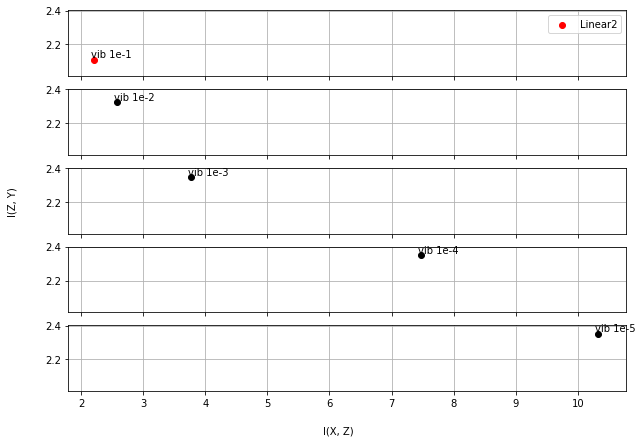

In [80]:
information_plane(vib_mie, 'vib')

In [10]:
seeds = do_vals
mi_df = do_mie
for i in range(len(seeds)):
    for j in range(len(layers)):
        if set_legend:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j], label='Linear%s' % layers_names[j]+' wd:%s'%seeds[i])
        else:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j])
        ax2.annotate('  do %d' % seeds[i], (mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1]))
        ax2.grid()
    set_legend = False

ax2.set_xlabel('I(X, Z)')
ax2.set_ylabel('I(Z, Y)')

fig2.legend()
fig2.set_size_inches(10, 7, forward=True)
fig2.show()
fig2.savefig('wd_vs_dropout.png')


/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


                                                0  \
0          (11.1424207122405, 2.3448912600205407)   
1000     (11.788130964713075, 2.3445274845401256)   
10000    (11.427419411627602, 2.3455625546487022)   
99999    (11.324993161793568, 2.3464037117799883)   
1000000   (11.367563289488661, 2.345736265323738)   

                                                1  \
0         (11.642456285196458, 2.345349877225279)   
1000        (11.0006423685788, 2.343377195687091)   
10000    (10.190286082679062, 2.3471514119356165)   
99999     (10.879974640941168, 2.346806370392795)   
1000000  (10.985195216409405, 2.3446425349226496)   

                                                2  
0         (12.100688300426535, 2.353458126009358)  
1000      (11.275901627201605, 2.346506446176231)  
10000     (10.73224299891865, 2.3513225379148364)  
99999     (10.963589394827023, 2.350299199751768)  
1000000  (12.065866465817132, 2.3528739575526156)  
[2]
0
0
0
0
0


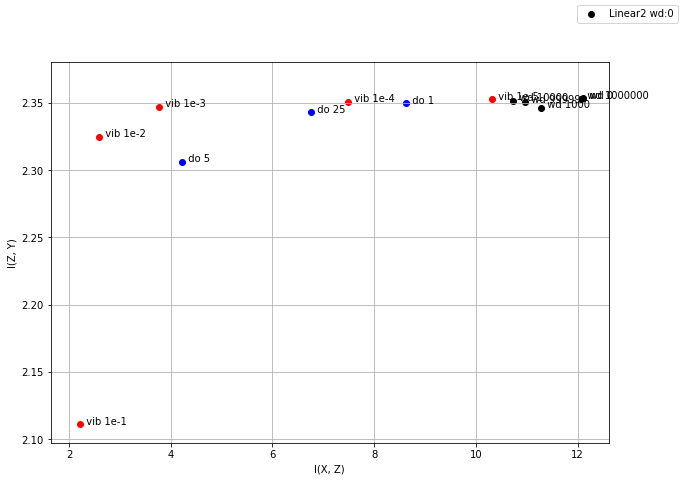

In [73]:
mi_df = wd_mie
print(mi_df)
fig2, ax2 = plt.subplots(1, 1, sharex=True)
set_legend = True
layers = [2]
print(layers)
if len(layers) < 8:
    colors = ['black', 'blue', 'red', 'green', 'yellow', 'cyan', 'magenta']
else:
    colors = [rand_color() for _ in range(len(layers))]

seeds = wd_vals
layers_names = layers
mi_df = wd_mie
for i in range(len(seeds)):
    for j in range(len(layers)):
        colors[j] = 'black'
        if set_legend:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j], label='Linear%s' % layers_names[j]+' wd:%s'%seeds[i])
        else:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j])
        ax2.annotate('  wd %d' % seeds[i], (mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1]))
        ax2.grid()
    set_legend = False
    
seeds = do_vals
layers_names = layers
mi_df = do_mie
for i in range(len(seeds)):
    for j in range(len(layers)):
        colors[j] = 'blue'
        if set_legend:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j], label='Linear%s' % layers_names[j]+' do:%s'%seeds[i])
        else:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j])
        ax2.annotate('  do %d' % seeds[i], (mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1]))
        ax2.grid()
    set_legend = False

seeds = ['1e-%s' % i for i in vib_beta_vals]
layers_names = [0]
mi_df = vib_mie

for i in range(len(seeds)):
    for j in range(len(layers_names)):
        print(layers_names[j])
        colors[j] = 'red'
        if set_legend:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j], label='Linear%s' % layers_names[j]+' vib:%s'%seeds[i])
        else:
            ax2.scatter(mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1], color=colors[j])
        ax2.annotate('  vib %s' % seeds[i], (mi_df.loc[seeds[i], layers_names[j]][0], mi_df.loc[seeds[i], layers_names[j]][1]))
        ax2.grid()
    set_legend = False

ax2.set_xlabel('I(X, Z)')
ax2.set_ylabel('I(Z, Y)')

fig2.legend()
fig2.set_size_inches(10, 7, forward=True)
fig2.savefig('all_linear2.png')



In [69]:
['1e%s' % i for i in seeds]

['1e1', '1e2', '1e3', '1e4', '1e5']

In [64]:
vib_mie[0]

1e-1    (2.2147030251286037, 2.1111897779584496)
1e-2     (2.5872479629177616, 2.324947485285348)
1e-3        (3.774134405133848, 2.3471957521416)
1e-4      (7.481858338789919, 2.350941629771373)
1e-5     (10.320041737850245, 2.352484049672764)
Name: 0, dtype: object